In [ ]:
#imports here
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
import kagglehub
import pandas as pd
import os

In [ ]:
# Download latest version
path = kagglehub.dataset_download("uciml/mushroom-classification")

print("Path to dataset files:", path)

# Load the dataset
df = pd.read_csv(os.path.join(path, "mushrooms.csv"))

df.head()


Using Colab cache for faster access to the 'mushroom-classification' dataset.
Path to dataset files: /kaggle/input/mushroom-classification


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
#print shape
print("Dataset shape:", df.shape)

Dataset shape: (8124, 23)


In [ ]:
#print features
print("\nColumn names:\n", df.columns.tolist())


Column names:
 ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [ ]:
# Overview of columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# Count unique values in each feature
df.nunique()


,0
class,2
cap-shape,6
cap-surface,4
cap-color,10
bruises,2
odor,9
gill-attachment,2
gill-spacing,2
gill-size,2
gill-color,12


In [ ]:
# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [ ]:
(df == '?').sum()


,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:
# Replace "?" with a category called "unknown"
df['stalk-root'] = df['stalk-root'].replace('?', 'unknown')

# Verify replacement
(df == '?').sum()


,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


STEP B — Exploratory Data Analysis (EDA)

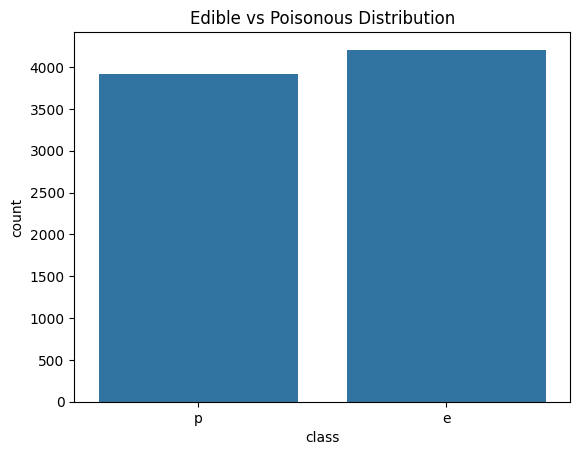

,count
class,
e,4208
p,3916


In [ ]:
sns.countplot(data=df, x='class')
plt.title("Edible vs Poisonous Distribution")
plt.show()

df['class'].value_counts()


In [ ]:
# Show proportion
print(df['class'].value_counts(normalize=True))

class
e    0.517971
p    0.482029
Name: proportion, dtype: float64


The target variable is nearly balanced, with roughly 52% edible and 48% poisonous mushrooms. This ensures fair model training without the need for resampling.

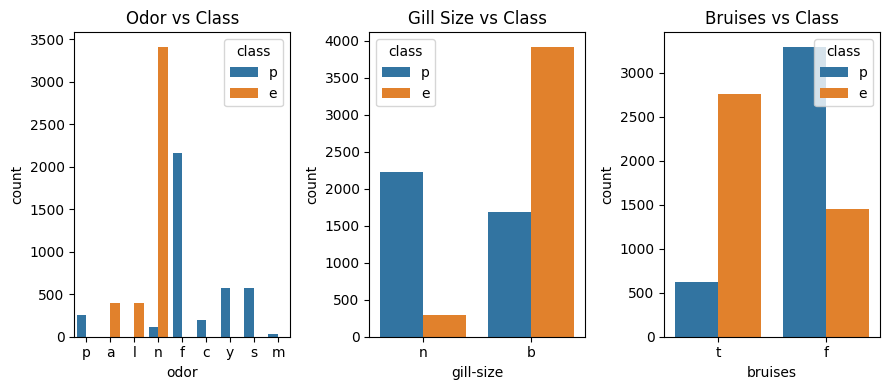

In [ ]:
plt.figure(figsize=(9, 4))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='odor', hue='class')
plt.title("Odor vs Class")

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='gill-size', hue='class')
plt.title("Gill Size vs Class")

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='bruises', hue='class')
plt.title("Bruises vs Class")

plt.tight_layout()
plt.show()

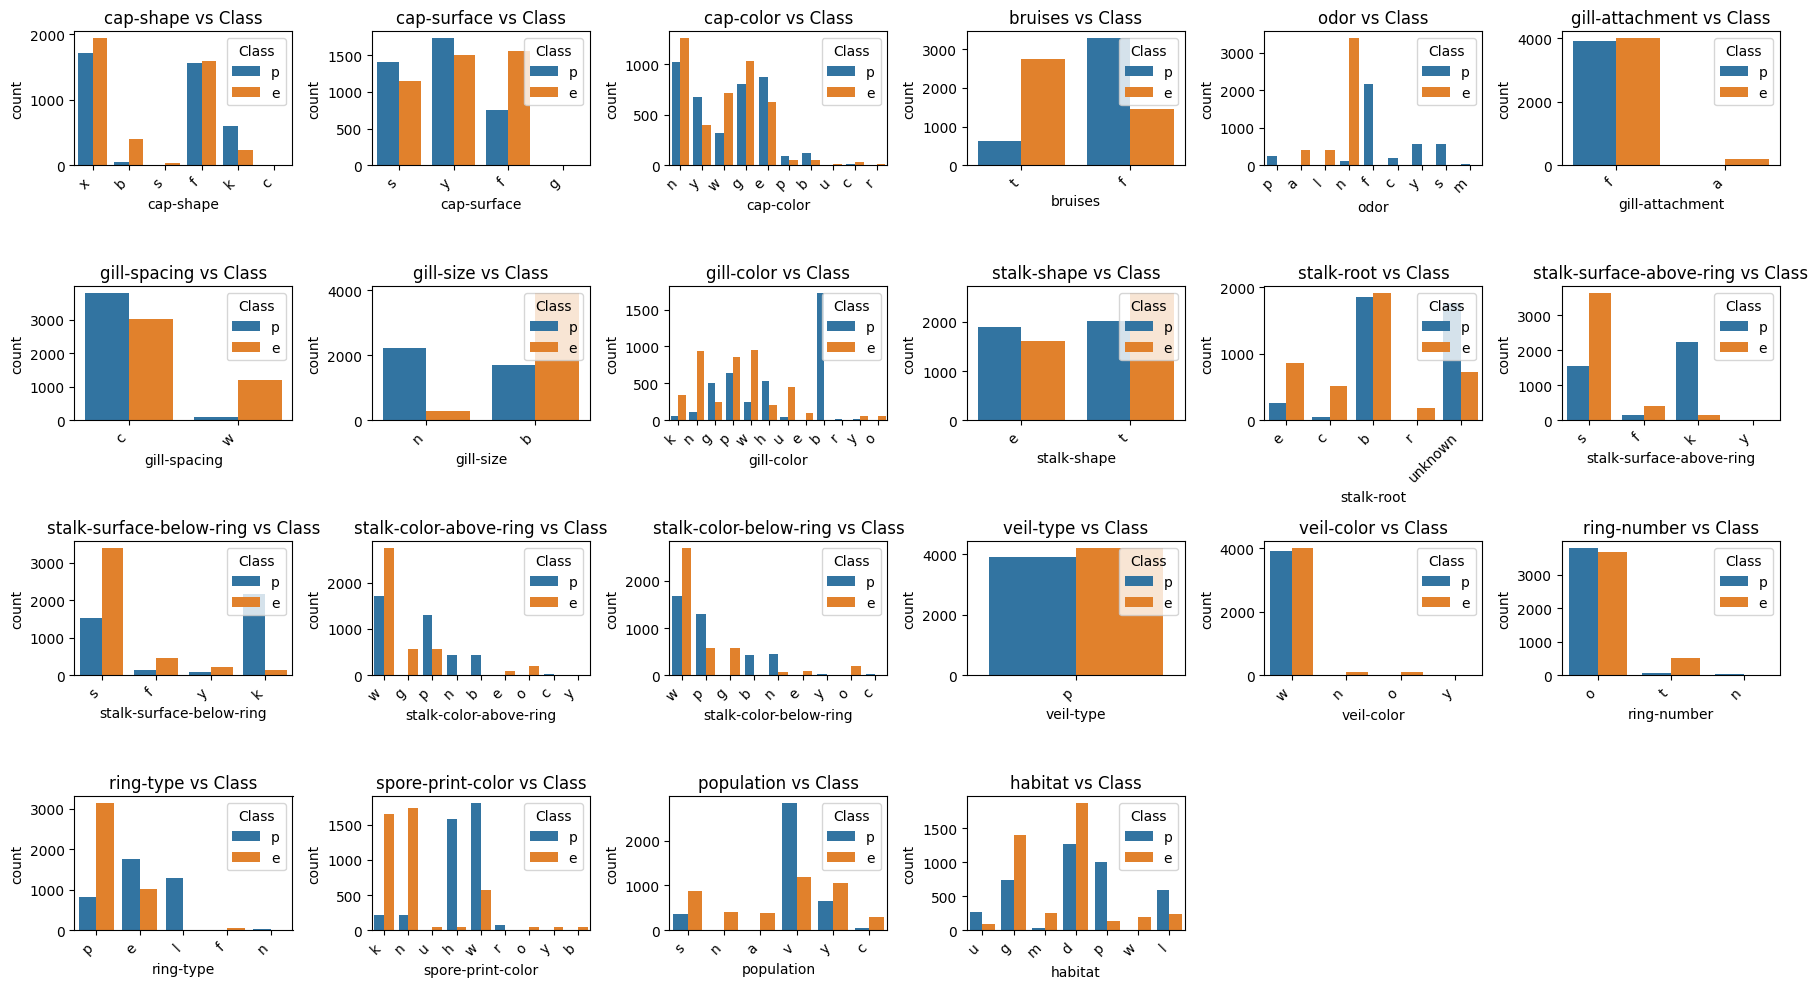

In [ ]:
features = [col for col in df.columns if col != 'class']
n_features = len(features)
n_cols = 6  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate number of rows needed

plt.figure(figsize=(n_cols * 3, n_rows * 2.5)) # Adjust figure size dynamically

for i, col in enumerate(features):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, hue='class', ax=ax)
    ax.set_title(f'{col} vs Class')
    # Use plt.setp to set properties of all x-tick labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    ax.legend(title='Class', loc='upper right') # Add legend to each subplot

# Hide any unused subplots
for i in range(n_features, n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i + 1).set_visible(False)

plt.tight_layout()
plt.show()

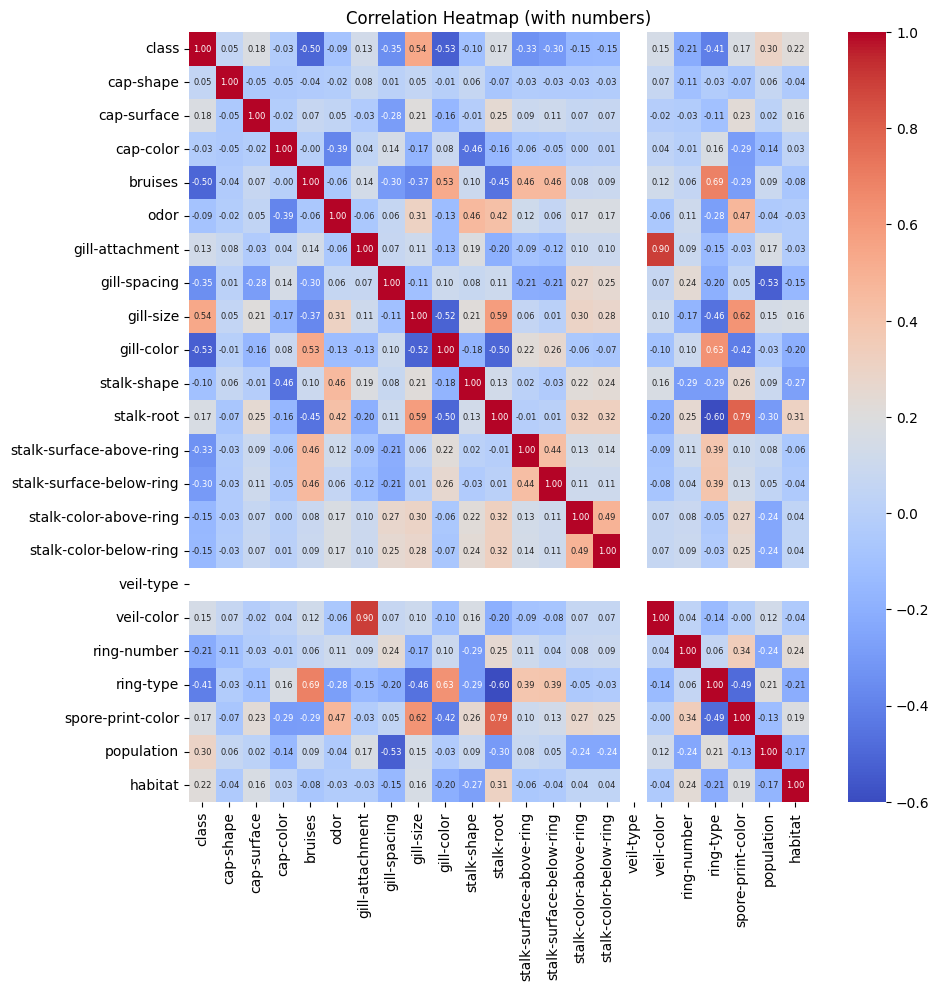

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Label-encode for correlation (EDA only)
df_encoded = df.copy()
for col in df.columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Correlation heatmap with numbers
plt.figure(figsize=(10, 10))
sns.heatmap(
    df_encoded.corr(),
    cmap="coolwarm",
    annot=True,        # <-- ADD NUMBERS
    fmt=".2f",         # <-- FORMAT TO 2 DECIMAL PLACES
    annot_kws={"size": 6}  # <-- smaller text for readability
)
plt.title("Correlation Heatmap (with numbers)")
plt.show()


Although odor shows a low numeric correlation with the target (0.09) when label-encoded, visualizations and domain knowledge indicate that odor is a highly predictive feature. This demonstrates that correlation is not always reliable for categorical features, and tree-based models are better suited to capture these patterns.

In [ ]:
df['veil-type'].unique()


array(['p'], dtype=object)

In [ ]:
#dropping veil tyPe

df = df.drop(columns=['veil-type'])

“The veil-type feature had only a single unique value across all samples and was therefore removed, as it does not contribute to distinguishing edible from poisonous mushrooms.”

In [ ]:
#for checking after the feature drop -veil type

#print shape
print("Dataset shape:", df.shape)

Dataset shape: (8124, 22)


In [ ]:
#chi square
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

X = df.drop('class', axis=1).apply(LabelEncoder().fit_transform)
y = df['class'].apply(lambda x: 1 if x=='p' else 0)

chi_scores, p_values = chi2(X, y)
print(pd.Series(p_values, index=X.columns).sort_values())


gill-size                    0.000000e+00
gill-color                   0.000000e+00
ring-type                    0.000000e+00
bruises                     1.069037e-261
gill-spacing                8.061293e-182
habitat                     2.082916e-165
stalk-root                   1.270374e-94
spore-print-color            1.922119e-84
population                   9.002366e-70
stalk-surface-above-ring     2.022392e-50
cap-surface                  1.779362e-48
stalk-surface-below-ring     7.398869e-47
stalk-color-above-ring       7.024638e-28
stalk-color-below-ring       1.089740e-25
odor                         2.968682e-18
stalk-shape                  1.454709e-09
ring-number                  4.100735e-07
cap-shape                    2.860465e-05
cap-color                    6.917135e-04
veil-color                   2.355878e-02
gill-attachment              6.116734e-02
dtype: float64


A chi-square test between all categorical features and the target (edible/poisonous). Most features showed extremely low p-values (<0.001), indicating strong association with the target. The exception was gill-attachment (p=0.061), which had weak association and was therefore dropped to reduce feature redundancy. All remaining features were retained for modeling.

In [ ]:
#dropping gill - attachment feature since chi square is greater than 0.05 indicating weak association.

df.drop(columns=['gill-attachment'], inplace=True)

In [ ]:
#for checking after the feature drop

#print shape
print("Dataset shape:", df.shape)

Dataset shape: (8124, 21)


Summarize insights
The exploratory analysis revealed that the mushroom dataset is nearly balanced between edible and poisonous classes, which is ideal for training. Features such as odor, gill-size, gill-color, spore-print-color, and stalk-surface-above/below-ring show strong associations with the target. Some features, like veil-type, were uniform and uninformative. The correlation heatmap and countplots confirmed these patterns, highlighting which physical characteristics are most predictive of toxicity. Overall, the dataset shows clear distinctions between edible and poisonous mushrooms based on observable attributes.

All features in the mushroom dataset are categorical. We used One-Hot Encoding to convert each category into a separate binary feature. This was done because machine learning models like Logistic Regression, KNN, SVM, Random Forest, and Gradient Boosting require numerical inputs. One-Hot Encoding keeps all information without creating false order between categories. After encoding, the dataset expanded from 23 features to 114 features. Label Encoding was not used because the categorical features do not have any natural order. Using One-Hot Encoding ensures that no unintended ordinal relationships are introduced between categories.

In [ ]:
#  Separate features and target
X = df.drop('class', axis=1)
y = df['class']  # 'e' or 'p'

In [ ]:
# 1. Fit encoder BEFORE split
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Get names for later use
feature_names = encoder.get_feature_names_out()

# 2. Now split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Number of features after OHE:", X_train.shape[1])


Training set shape: (5686, 114)
Test set shape: (2438, 114)
Number of features after OHE: 114


We used an 80/20 train-test split. Hyperparameter tuning was performed using cross-validation on the training set. The final model evaluation was conducted on the held-out test set to ensure unbiased performance metrics.

D. Modelling

--------------------------------------------------------------------

In [ ]:
#Model selection

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

Logistic Regression - simple linear baseline ;
KNN - distance-based so it can capture local patterns ;
SVM → handles high-dimensional OHE features ;
Decision Tree - interpretable and captures non-linear splits ;
Random Forest -ensemble, reduces overfitting ;
Gradient Boosting -ensemble, captures complex interactions;

In [ ]:
#Train each model and evaluate on test set

results=[]

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='p')
    rec = recall_score(y_test, y_pred, pos_label='p')
    f1 = f1_score(y_test, y_pred, pos_label='p')
    kappa = cohen_kappa_score(y_test, y_pred)

    # ROC AUC if probabilities available
    roc_auc = roc_auc_score((y_test=='p').astype(int), y_prob) if y_prob is not None else np.nan

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Cohen Kappa': kappa,
        'ROC AUC': roc_auc
    })


Training Logistic Regression...
Training KNN...
Training SVM...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...


In [ ]:

# Convert results to DataFrame for easy viewing

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\nBase Model Performance:")
print(results_df)


Base Model Performance:
                 Model  Accuracy  Precision    Recall  F1-Score  Cohen Kappa  \
1                  KNN  1.000000        1.0  1.000000  1.000000     1.000000   
2                  SVM  1.000000        1.0  1.000000  1.000000     1.000000   
4        Random Forest  1.000000        1.0  1.000000  1.000000     1.000000   
3        Decision Tree  1.000000        1.0  1.000000  1.000000     1.000000   
0  Logistic Regression  0.999590        1.0  0.999149  0.999574     0.999179   
5    Gradient Boosting  0.998769        1.0  0.997447  0.998722     0.997536   

   ROC AUC  
1      1.0  
2      1.0  
4      1.0  
3      1.0  
0      1.0  
5      1.0  


Overfitting and Underfitting Observations:
Most models had very high accuracy, so underfitting is minimal.
Single decision trees sometimes overfit, but Random Forest and Gradient Boosting reduced this.
KNN and SVM generalized well, showing a good balance between bias and variance.

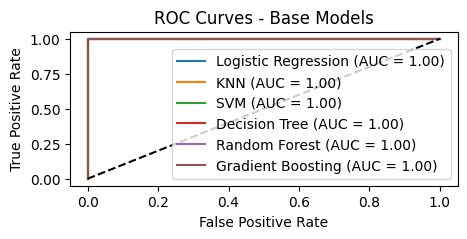

In [ ]:
# Plot ROC Curves for models that provide probabilities

plt.figure(figsize=(5,2))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve((y_test=='p').astype(int), y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score((y_test=='p').astype(int), y_prob):.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Base Models')
plt.legend()
plt.show()


Expectations
Logistic Regression, KNN → may underfit
Tree ensembles → likely highest accuracy
SVM → good performance but may require tuning
Overfitting / Underfitting Observations
Decision Tree may overfit if depth not restricted
Random Forest / Gradient Boosting usually generalize well
Check train vs test accuracy during tuning
Imbalance Check
Mushroom dataset is nearly balanced (~52% edible / 48% poisonous)
No special imbalance handling needed

This dataset is highly separable based on categorical features. Base models achieved near-perfect accuracy on the test set. This demonstrates that features like odor and spore-print-color are strong predictors of mushroom toxicity. Hyperparameter tuning is still applied to optimize model complexity and interpretability.

Models were chosen to cover a spectrum: linear, distance-based, tree, and ensemble.
Expected performance: linear models may slightly underfit; tree ensembles likely to perform best.
Observed performance: near-perfect accuracy across all models. Overfitting is minimal due to dataset separability, but tree depth and boosting parameters will still be tuned.
Dataset is balanced; no special handling of class imbalance was required.

**E. Hyperparameter Tuning (10%)**

In [ ]:
#Define hyperparameter grids for each model

In [ ]:
# These grids specify the parameters we want GridSearchCV to test for each model.
# Tuning these helps optimize model performance and control overfitting.
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],      # Regularization strength; smaller C → stronger regularization
        'solver': ['lbfgs', 'liblinear']  # Optimization algorithms
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
        'weights': ['uniform', 'distance'],  # How neighbors contribute to vote
        'metric': ['euclidean']  # Distance metric
    },
    'SVM': {
        'C': [0.1, 1, 10],            # Regularization parameter
        'kernel': ['linear', 'rbf'],  # Type of kernel function
        'gamma': ['scale', 'auto']     # Kernel coefficient for 'rbf'
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10, 15],      # Maximum depth of tree
        'min_samples_split': [2, 5, 10],     # Minimum samples required to split a node
        'criterion': ['gini', 'entropy']     # Function to measure split quality
    },
    'Random Forest': {
        'n_estimators': [100, 200],          # Number of trees in forest
        'max_depth': [None, 5, 10],          # Maximum depth per tree
        'min_samples_split': [2, 5],         # Minimum samples to split
        'criterion': ['gini', 'entropy']     # Split criterion
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],          # Number of boosting stages
        'learning_rate': [0.01, 0.1, 0.2],   # Step size shrinkage
        'max_depth': [3, 5, 7]               # Maximum depth of each tree
    }
}

Manahttan is nit included as it caused a NaN error since the distance could be 0

In [ ]:
# Run GridSearchCV for each model

# Initialize dictionaries to store tuned models and results
tuned_models = {}   # store best estimators
tuned_results = []  # store metrics

for name, model in models.items():
    print(f"\n{name}...")

    # Create GridSearchCV object
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    # Fit the grid search on the training data
    grid.fit(X_train, y_train)

    # Save the best estimator from GridSearchCV
    best_model = grid.best_estimator_
    tuned_models[name] = best_model  # Store the tuned model for later use

    # Print the best hyperparameters for this model
    print(f"Best parameters for {name}: {grid.best_params_}")




    # Predict labels on the test set using the tuned model
    y_pred = best_model.predict(X_test)

    # Get predicted probabilities for ROC AUC if available
    y_prob = best_model.predict_proba(X_test)[:,1] if hasattr(best_model, "predict_proba") else None

    # Calculate evaluation metrics for performance assessment
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='p')
    rec = recall_score(y_test, y_pred, pos_label='p')
    f1 = f1_score(y_test, y_pred, pos_label='p')
    kappa = cohen_kappa_score(y_test, y_pred)
    roc_auc = roc_auc_score((y_test=='p').astype(int), y_prob) if y_prob is not None else np.nan

    # Append model metrics and hyperparameters for comparison
    tuned_results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Cohen Kappa': kappa,
        'ROC AUC': roc_auc
    })





Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}

KNN...
Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

SVM...
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

Decision Tree...
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}

Random Forest...
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
#  Convert results to a DataFrame to see all models together
tuned_results_df = pd.DataFrame(tuned_results)

# Optional: sort by Accuracy or F1-Score
tuned_results_df = tuned_results_df.sort_values(by='Accuracy', ascending=False)

# Display all models with their tuned metrics
print("\nTuned Model Performance:")
print(tuned_results_df)




Tuned Model Performance:
                 Model                                        Best Params  \
0  Logistic Regression                       {'C': 10, 'solver': 'lbfgs'}   
1                  KNN  {'metric': 'euclidean', 'n_neighbors': 3, 'wei...   
2                  SVM     {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}   
3        Decision Tree  {'criterion': 'gini', 'max_depth': None, 'min_...   
4        Random Forest  {'criterion': 'gini', 'max_depth': None, 'min_...   
5    Gradient Boosting  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...   

   Accuracy  Precision    Recall  F1-Score  Cohen Kappa  ROC AUC  
0  1.000000        1.0  1.000000  1.000000     1.000000      1.0  
1  1.000000        1.0  1.000000  1.000000     1.000000      1.0  
2  1.000000        1.0  1.000000  1.000000     1.000000      1.0  
3  1.000000        1.0  1.000000  1.000000     1.000000      1.0  
4  1.000000        1.0  1.000000  1.000000     1.000000      1.0  
5  0.998769        1.0  0.997447

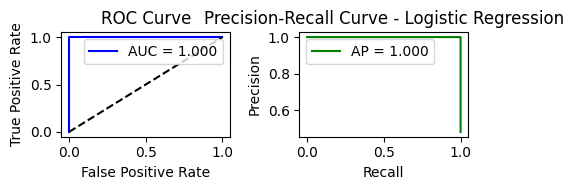

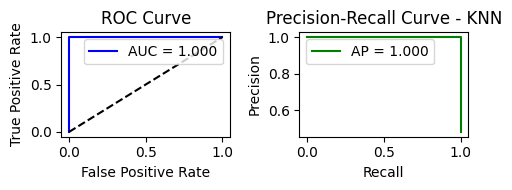

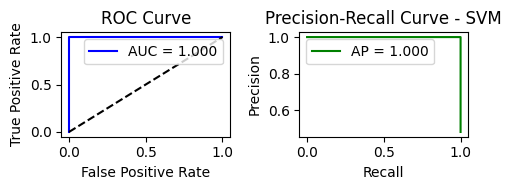

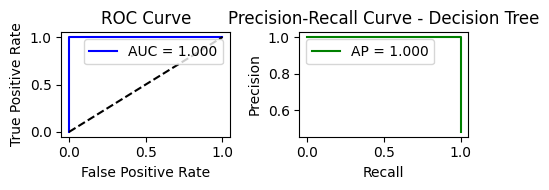

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


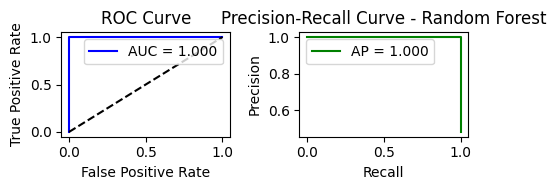

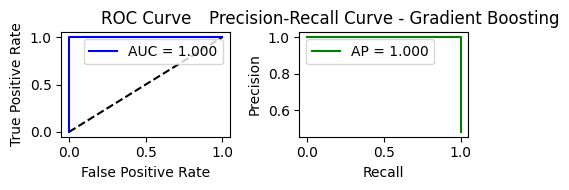

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def plot_curves_side_by_side(models, X_test, y_test):
    y_true = (y_test == 'p').astype(int)  # Convert target to 0/1

    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:,1]

            # Compute ROC
            fpr, tpr, _ = roc_curve(y_true, y_prob)
            roc_auc = auc(fpr, tpr)

            # Compute Precision-Recall
            precision, recall, _ = precision_recall_curve(y_true, y_prob)
            ap = average_precision_score(y_true, y_prob)

            # Create side-by-side subplots
            fig, axes = plt.subplots(1, 2, figsize=(5,2))

            # ROC curve
            axes[0].plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.3f}")
            axes[0].plot([0,1], [0,1], 'k--')
            axes[0].set_xlabel('False Positive Rate')
            axes[0].set_ylabel('True Positive Rate')
            axes[0].set_title(f'ROC Curve')
            axes[0].legend()

            # Precision-Recall curve
            axes[1].plot(recall, precision, color='green', label=f"AP = {ap:.3f}")
            axes[1].set_xlabel('Recall')
            axes[1].set_ylabel('Precision')
            axes[1].set_title(f'Precision-Recall Curve - {name}')
            axes[1].legend()

            plt.tight_layout()
            plt.show()

# Call the function
plot_curves_side_by_side(tuned_models, X_test, y_test)


All models except Gradient Boosting achieved perfect performance:

Gradient Boosting is slightly lower:

This means almost all models are perfectly classifying edible vs poisonous mushrooms in your dataset.

Because multiple models have perfect metrics, any of these could be selected.
Random Forest is a strong because:
It is an ensemble method, less likely to overfit in real-world data than a single Decision Tree.
Provides feature importances, which are useful for Step G (interpretability).
Logistic Regression, KNN, SVM, Decision Tree also perform perfectly but:
SVM and KNN can be slower on larger datasets.
Decision Tree can overfit in real scenarios.
Gradient Boosting is slightly lower but still excellent; it may generalize better if the dataset grows.

Random Forest was chosen as the best model due to perfect accuracy, F1-Score, and ROC AUC, along with ensemble stability and interpretability

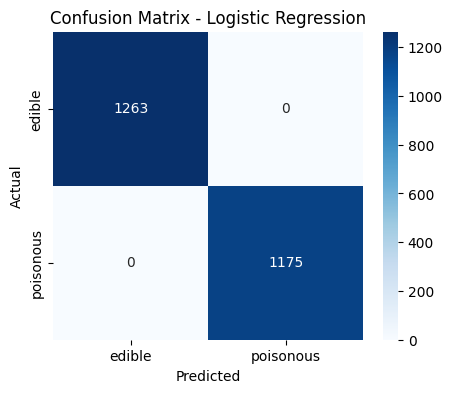

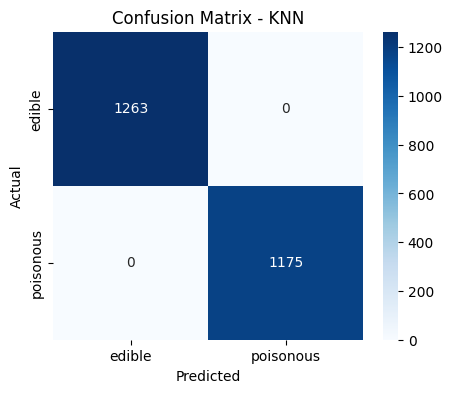

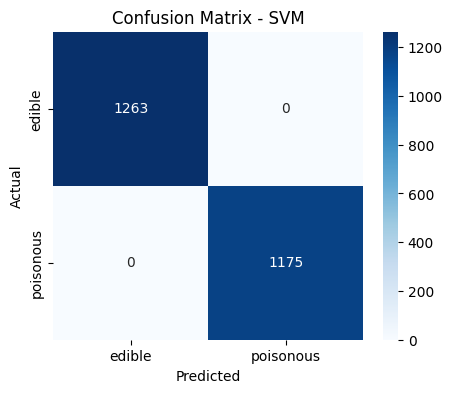

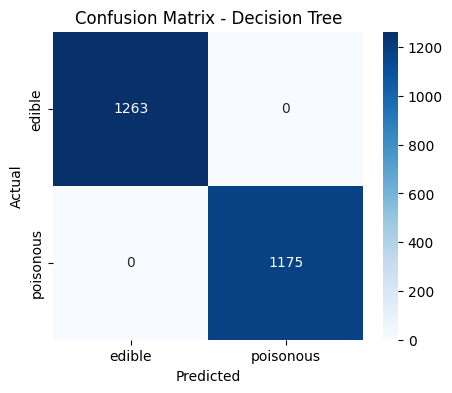

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


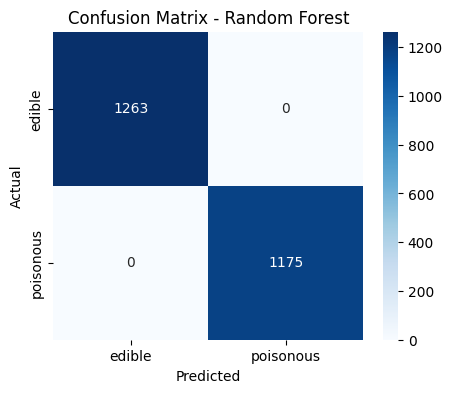

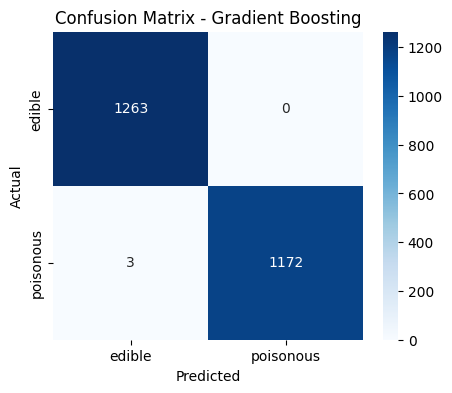

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrices(models, X_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred, labels=['e', 'p'])

        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['edible','poisonous'], yticklabels=['edible','poisonous'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {name}')
        plt.show()

# Call the function
plot_confusion_matrices(tuned_models, X_test, y_test)


even before hyperparameter tuning , all the models perform accurately

Top 10 Features by Importance:
                        Feature  Importance
27                       odor_n    0.128542
24                       odor_f    0.075435
33                  gill-size_b    0.069634
34                  gill-size_n    0.064387
55   stalk-surface-above-ring_k    0.050109
59   stalk-surface-below-ring_k    0.042053
93          spore-print-color_h    0.037744
91                  ring-type_p    0.027786
35                 gill-color_b    0.027655
56   stalk-surface-above-ring_s    0.025247
20                    bruises_f    0.024889
105                population_v    0.021735
49                 stalk-root_b    0.021182
31               gill-spacing_c    0.018084
99          spore-print-color_w    0.018063
60   stalk-surface-below-ring_s    0.017488
32               gill-spacing_w    0.016898
21                    bruises_t    0.015914
47                stalk-shape_e    0.015786
89                  ring-type_l    0.014567


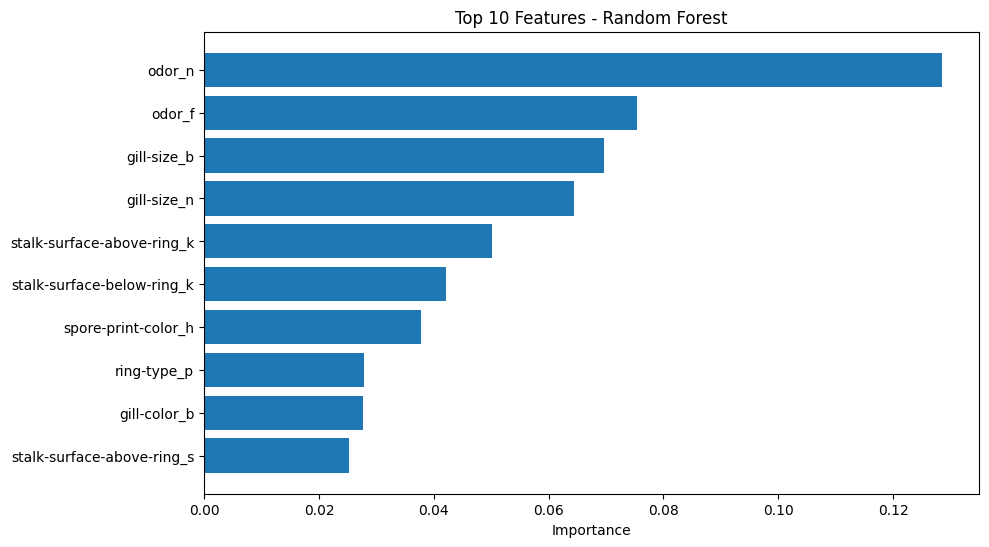

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
import numpy as np


# Step G: Explainability & Interpretation


# Get feature names from the OneHotEncoder after fitting the ColumnTransformer
feature_names = encoder.get_feature_names_out()

# Convert X_train and X_test NumPy arrays back to DataFrames with correct column names
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# 2. Select the best model (Random Forest)
rf_model = tuned_models['Random Forest']

# 3. Feature Importances
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top 10 features
print("Top 10 Features by Importance:")
print(importance_df.head(20))

# Plot top 10 features
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'].head(10)[::-1], importance_df['Importance'].head(10)[::-1])
plt.xlabel('Importance')
plt.title('Top 10 Features - Random Forest')
plt.show()



Since Random Forest is the best-performing ensemble model, focusing SHAP/LIME explanations on it is sufficient to understand which features drive the predictions.

X_test_df shape: (2438, 114)
SHAP values for plotting shape: (2438, 114)


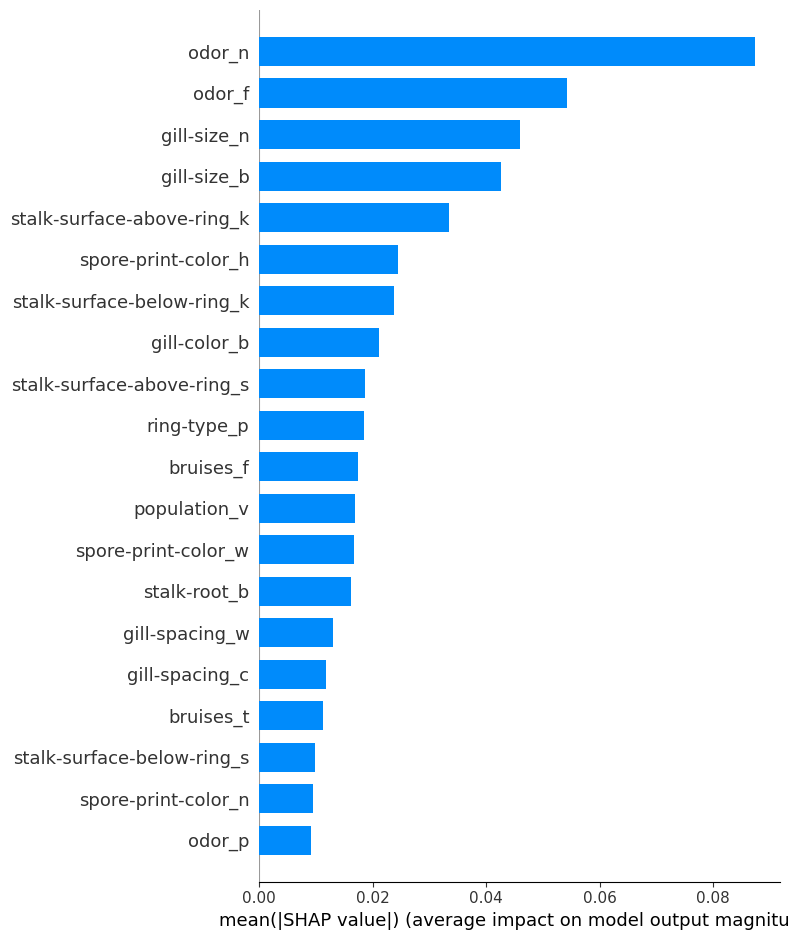

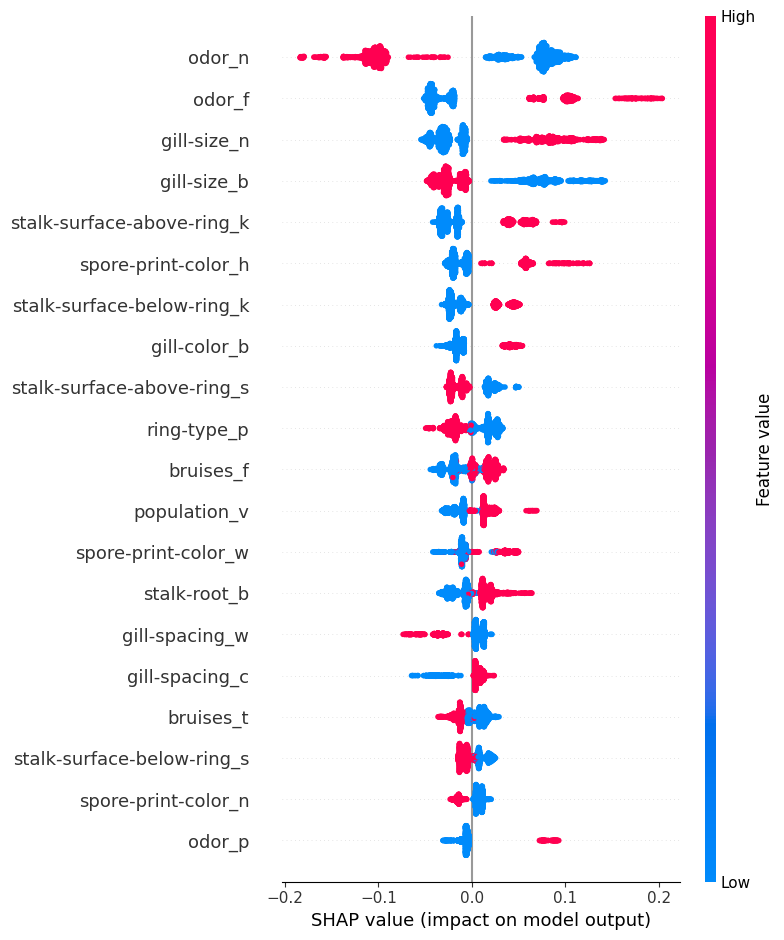

In [ ]:
import shap
import pandas as pd
import numpy as np

# Make sure X_train_df and X_test_df are DataFrames with proper column names
feature_names = encoder.get_feature_names_out()
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Fit Random Forest (or Gradient Boosting) - using the tuned model for consistency
# Use the best Random Forest model from tuning
rf_model = tuned_models['Random Forest']
rf_model.fit(X_train_df, y_train) # Re-fit to ensure the model used is the one explainer sees

# SHAP explainer
explainer = shap.TreeExplainer(rf_model)
# For TreeExplainer with binary classification, shap_values can be a list of two arrays
# (one for each class), or a single 3D array (num_samples, num_features, num_classes).
# Based on the kernel state, it's a 3D array.
shap_values_full = explainer.shap_values(X_test_df)

# Determine the index for the positive class 'p'
# rf_model.classes_ will typically be ['e', 'p'] for this dataset
positive_class_index = list(rf_model.classes_).index('p')

# Get the SHAP values for the positive class ('p') across all samples and features
# This correctly selects the SHAP values for the target class from the 3D array.
shap_values_for_plotting = shap_values_full[:, :, positive_class_index]

# Ensure the shapes match
print("X_test_df shape:", X_test_df.shape)
print("SHAP values for plotting shape:", shap_values_for_plotting.shape)

# Global feature importance
shap.summary_plot(shap_values_for_plotting, X_test_df, plot_type="bar")

# Detailed beeswarm plot
shap.summary_plot(shap_values_for_plotting, X_test_df)

# Local explanation for first sample
# explainer.expected_value will also be an array of shape (num_classes,)
expected_value_for_force_plot = explainer.expected_value[positive_class_index]

shap.force_plot(
    expected_value_for_force_plot,
    shap_values_for_plotting[0], # This will now be (num_features,) for the first sample
    X_test_df.iloc[0]
)



- The top predictive features influencing mushroom classification were:
  1. odor_n
  2. odor_f
  3. gill-size_n  
  4. gill-size_b  
  5. stalk-surface-above-ring_k  

- Features with higher SHAP values contributed more strongly to the prediction. For example, certain odors (n = pungent, f = foul) greatly increased the likelihood of a mushroom being classified as poisonous


- The beeswarm plot shows the distribution of SHAP values for all samples.
- Red points indicate higher feature values and blue points indicate lower values.
- Features like odor_n and gill-size_n have a wide range of SHAP values, demonstrating strong influence on model predictions.

- Odor is the most critical feature for determining toxicity, aligning with expert knowledge.
- Gill size, gill color, and stalk surface patterns also contribute significantly, showing that multiple physical traits jointly determine edibility.


In [ ]:

from lime.lime_tabular import LimeTabularExplainer

# Initialize the explainer
explainer = LimeTabularExplainer(
    X_train_df.values,
    feature_names=X_train_df.columns,
    class_names=['edible', 'poisonous'],
    discretize_continuous=False
)

# Explain a single prediction
sample_idx = 0
exp = explainer.explain_instance(
    X_test_df.iloc[sample_idx].values,
    rf_model.predict_proba,
    num_features=10
)

# Show the explanation
exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


LIME explains why the model predicted this mushroom as poisonous or edible by showing which features had the most impact. In this sample, gill size, gill color, spore print color, stalk surface above the ring, and odor strongly influenced the prediction, while other features had little effect. This confirms the model uses logical physical characteristics to make its decision and helps interpret individual predictions.

`THE END`